# Library Imports

In [47]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

These libraries provide functionality for data manipulation (pandas), visualization (matplotlib and seaborn), model training and evaluation (sklearn), and handling imbalanced datasets (imblearn).

# Loading the Dataset

In [51]:
# Load the Dataset
file_path = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
column_names = ["ID", "Diagnosis"] + [f"Feature_{i}" for i in range(1, 31)]
data = pd.read_csv(file_path, header=None, names=column_names)

The dataset is loaded from a UCI repository URL. The columns include an ID, a diagnosis (M for malignant and B for benign), and 30 feature measurements related to the breast cancer tumors.

# Basic Data Overview

In [54]:
data.head()

,ID,Diagnosis,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,...,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [55]:
data.tail() 

,ID,Diagnosis,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,...,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [56]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          569 non-null    int64  
 1   Diagnosis   569 non-null    object 
 2   Feature_1   569 non-null    float64
 3   Feature_2   569 non-null    float64
 4   Feature_3   569 non-null    float64
 5   Feature_4   569 non-null    float64
 6   Feature_5   569 non-null    float64
 7   Feature_6   569 non-null    float64
 8   Feature_7   569 non-null    float64
 9   Feature_8   569 non-null    float64
 10  Feature_9   569 non-null    float64
 11  Feature_10  569 non-null    float64
 12  Feature_11  569 non-null    float64
 13  Feature_12  569 non-null    float64
 14  Feature_13  569 non-null    float64
 15  Feature_14  569 non-null    float64
 16  Feature_15  569 non-null    float64
 17  Feature_16  569 non-null    float64
 18  Feature_17  569 non-null    float64
 19  Feature_18  569 non-null    f

In [61]:
data.describe()

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [63]:
data.describe().T # Transpose to view in better format

,count,mean,std,min,25%,50%,75%,max
ID,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
Feature_1,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
Feature_2,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
Feature_3,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
Feature_4,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
Feature_5,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
Feature_6,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
Feature_7,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
Feature_8,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
Feature_9,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [65]:
print(f"Shape of dataset: {data.shape}")

Shape of dataset: (569, 32)


Displays the first and last few rows of the dataset, its structure, and summary statistics (mean, standard deviation, etc.) for each feature. The shape provides insights into the number of samples and features.

# Check for duplicate rows

In [69]:
# Check for duplicate rows
num_total_rows = len(data)
num_duplicate_rows = data.duplicated().sum()
percentage_duplicates = (num_duplicate_rows / num_total_rows) * 100
print(f"\nNumber of Rows with Duplicates: {num_duplicate_rows}")
print(f"Percentage of Duplicate Rows: {percentage_duplicates:.2f}%")


Number of Rows with Duplicates: 0
Percentage of Duplicate Rows: 0.00%


This block checks for duplicate entries in the dataset and calculates their percentage, which is essential to ensure data quality.

# Unique Value Counts

In [73]:
# Count unique values for each column 
unique_counts = data.nunique()
# Display the unique counts 
print(unique_counts)

ID            569
Diagnosis       2
Feature_1     456
Feature_2     479
Feature_3     522
Feature_4     539
Feature_5     474
Feature_6     537
Feature_7     537
Feature_8     542
Feature_9     432
Feature_10    499
Feature_11    540
Feature_12    519
Feature_13    533
Feature_14    528
Feature_15    547
Feature_16    541
Feature_17    533
Feature_18    507
Feature_19    498
Feature_20    545
Feature_21    457
Feature_22    511
Feature_23    514
Feature_24    544
Feature_25    411
Feature_26    529
Feature_27    539
Feature_28    492
Feature_29    500
Feature_30    535
dtype: int64


Displays the number of unique values in each column, which helps in understanding the variability of the data.

# Drop non-numeric columns

In [77]:
# Drop non-numeric columns
data.drop('ID', axis=1, inplace=True)

The ID column is removed as it doesn't provide any useful information for the classification task.

# Encode Labels

In [81]:
# Encode Labels: Encoding 'Diagnosis' column (1 for Malignant, 0 for Benign)
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

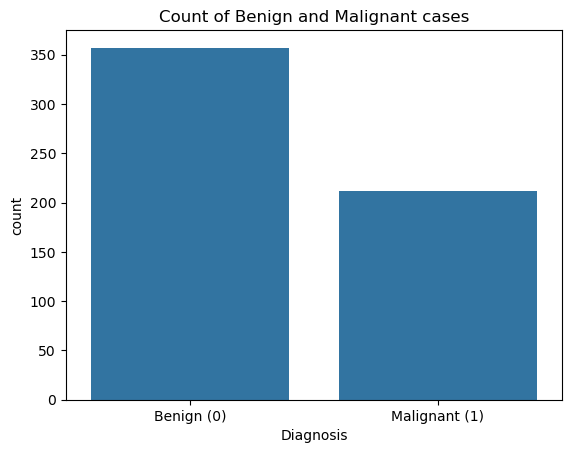

In [83]:
sns.countplot(x='Diagnosis', data=data)
plt.title('Count of Benign and Malignant cases')
plt.xticks(ticks=[0, 1], labels=["Benign (0)", "Malignant (1)"])
plt.show()

The 'Diagnosis' column is encoded to numerical values (1 for malignant, 0 for benign), making it suitable for model training. The count plot visually represents the distribution of cases.

# Pie Chart for Distribution

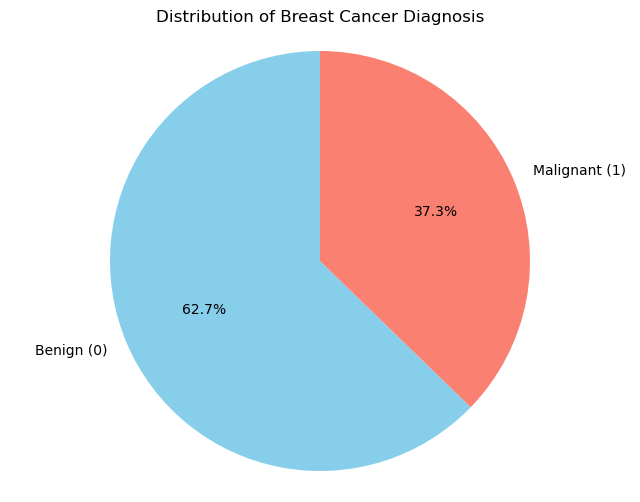

In [87]:
# Create a pie chart for the Distribution of Breast Cancer Diagnosis
diagnosis_counts = data['Diagnosis'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(diagnosis_counts, labels=['Benign (0)', 'Malignant (1)'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Distribution of Breast Cancer Diagnosis')
plt.axis('equal')
plt.show()

This creates a pie chart to visualize the proportion of benign and malignant cases in the dataset.

# Checking for Missing Values

In [95]:
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)
# Confirm if there are no missing values
if missing_values.sum() == 0:
    print("No missing values found in the dataset.")
else:
    print("Some columns have missing values.")


Missing values in each column:
Diagnosis     0
Feature_1     0
Feature_2     0
Feature_3     0
Feature_4     0
Feature_5     0
Feature_6     0
Feature_7     0
Feature_8     0
Feature_9     0
Feature_10    0
Feature_11    0
Feature_12    0
Feature_13    0
Feature_14    0
Feature_15    0
Feature_16    0
Feature_17    0
Feature_18    0
Feature_19    0
Feature_20    0
Feature_21    0
Feature_22    0
Feature_23    0
Feature_24    0
Feature_25    0
Feature_26    0
Feature_27    0
Feature_28    0
Feature_29    0
Feature_30    0
dtype: int64
No missing values found in the dataset.


This part checks for any missing values in the dataset and prints the count for each column, which is crucial for data integrity.

# Correlation Heatmap

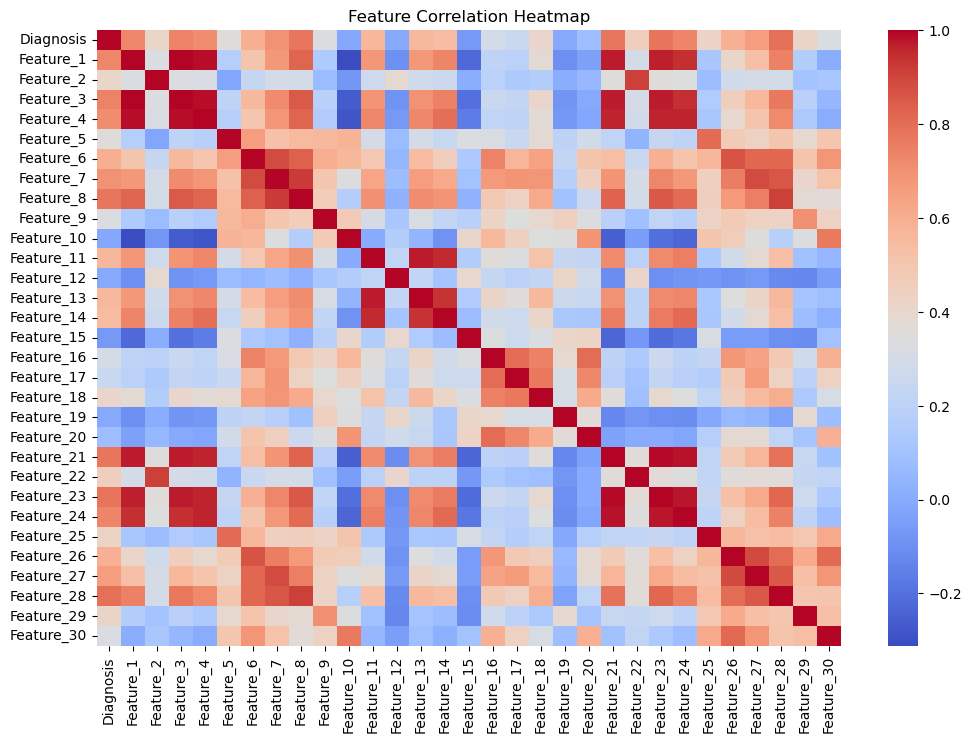

In [99]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

The correlation heatmap visualizes relationships between features. Strong correlations can indicate redundancy or inform feature selection.

# Positive Correlation Scatter Plots

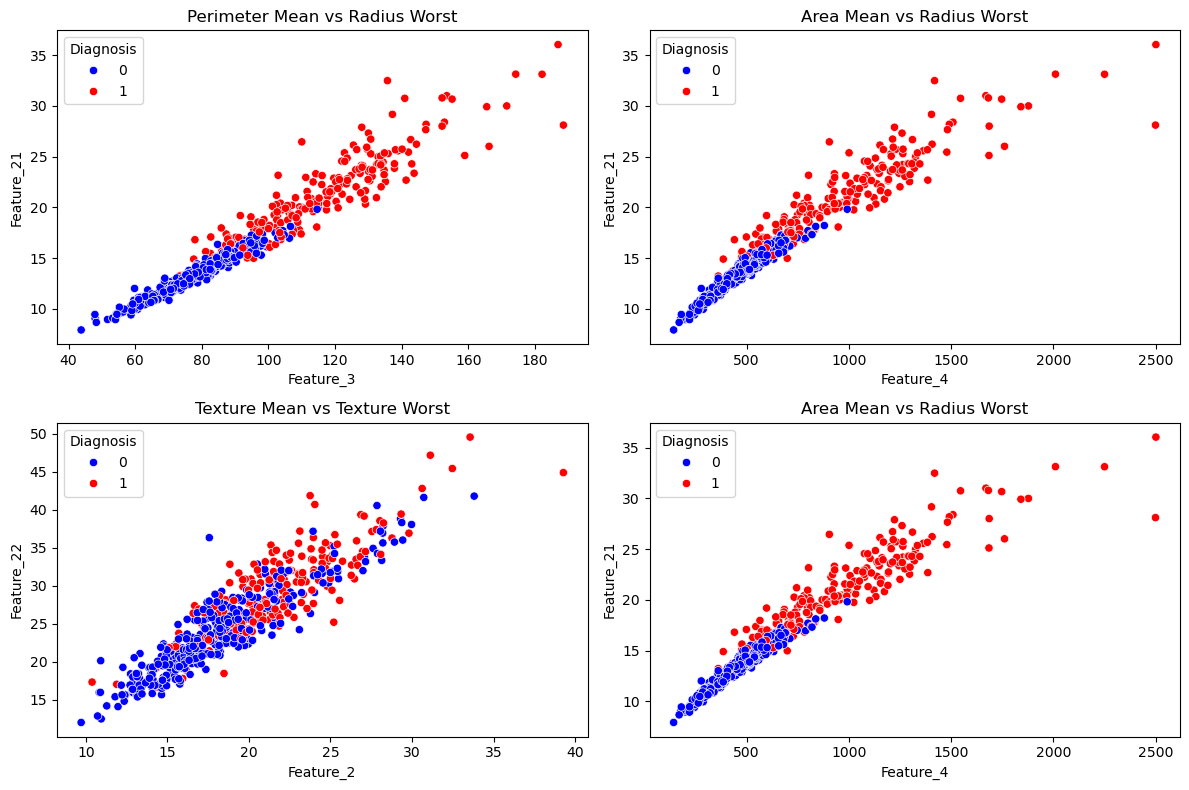

In [103]:
# Plotting positive correlated features
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x=data['Feature_3'], y=data['Feature_21'], hue=data['Diagnosis'], palette=['blue', 'red'])
plt.title('Perimeter Mean vs Radius Worst')

plt.subplot(2, 2, 2)
sns.scatterplot(x=data['Feature_4'], y=data['Feature_21'], hue=data['Diagnosis'], palette=['blue', 'red'])
plt.title('Area Mean vs Radius Worst')

plt.subplot(2, 2, 3)
sns.scatterplot(x=data['Feature_2'], y=data['Feature_22'], hue=data['Diagnosis'], palette=['blue', 'red'])
plt.title('Texture Mean vs Texture Worst')

plt.subplot(2, 2, 4)
sns.scatterplot(x=data['Feature_4'], y=data['Feature_21'], hue=data['Diagnosis'], palette=['blue', 'red'])
plt.title('Area Mean vs Radius Worst')

plt.tight_layout()
plt.show()

Scatter plots explore relationships between selected features and the target variable, revealing patterns that may help in diagnosis.

# Outlier Detection

In [107]:
# Calculate and visualize the impact of outliers
# Define IQR method for outlier detection
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

In [109]:
# Identify outliers
outliers = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))
print("\nOutliers detected:")
print(outliers.sum())


Outliers detected:
Diagnosis      0
Feature_1     14
Feature_2      7
Feature_3     13
Feature_4     25
Feature_5      6
Feature_6     16
Feature_7     18
Feature_8     10
Feature_9     15
Feature_10    15
Feature_11    38
Feature_12    20
Feature_13    38
Feature_14    65
Feature_15    30
Feature_16    28
Feature_17    22
Feature_18    19
Feature_19    27
Feature_20    28
Feature_21    17
Feature_22     5
Feature_23    15
Feature_24    35
Feature_25     7
Feature_26    16
Feature_27    12
Feature_28     0
Feature_29    23
Feature_30    24
dtype: int64


Calculates the Interquartile Range (IQR) to identify outliers in the data, which can significantly affect model performance.

# Outlier Visualization

In [113]:
# Get the number of outliers for each column
num_outliers_per_column = outliers.sum()

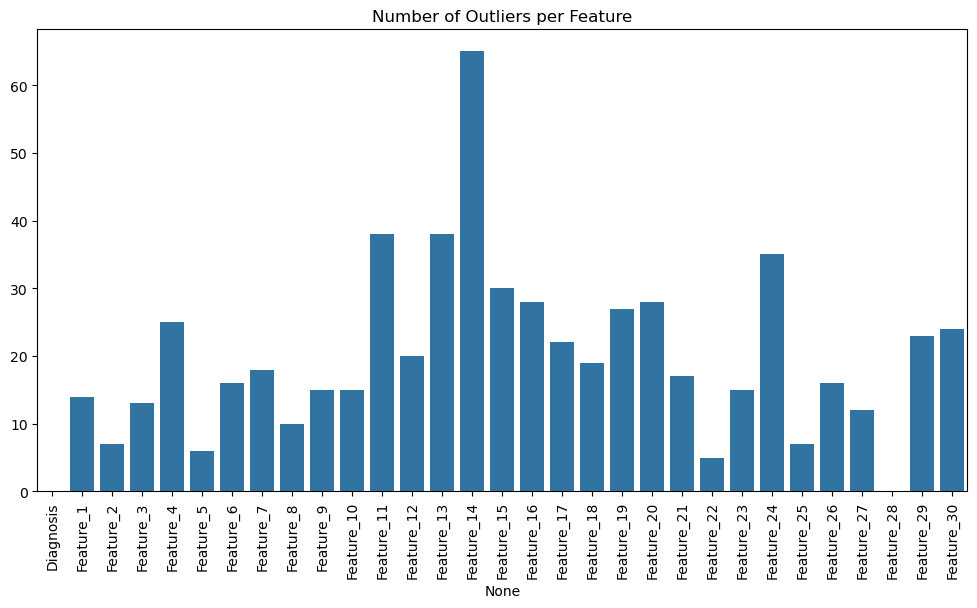

In [115]:
# Visualize the number of outliers per feature
plt.figure(figsize=(12, 6))
sns.barplot(x=num_outliers_per_column.index, y=num_outliers_per_column.values)
plt.xticks(rotation=90)
plt.title("Number of Outliers per Feature")
plt.show()

Displays a bar chart of the number of outliers detected in each feature, aiding in understanding the distribution of values.

# Feature and Label Separation

In [125]:
# Split data into features and labels
X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']

Separates features (X) from labels (y) for training and testing the model.

# Feature Scaling

In [131]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [133]:
# Display the first few rows of the scaled features
print(pd.DataFrame(X_scaled, columns=X.columns).head())

   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0   1.097064  -2.073335   1.269934   0.984375   1.568466   3.283515   
1   1.829821  -0.353632   1.685955   1.908708  -0.826962  -0.487072   
2   1.579888   0.456187   1.566503   1.558884   0.942210   1.052926   
3  -0.768909   0.253732  -0.592687  -0.764464   3.283553   3.402909   
4   1.750297  -1.151816   1.776573   1.826229   0.280372   0.539340   

   Feature_7  Feature_8  Feature_9  Feature_10  ...  Feature_21  Feature_22  \
0   2.652874   2.532475   2.217515    2.255747  ...    1.886690   -1.359293   
1  -0.023846   0.548144   0.001392   -0.868652  ...    1.805927   -0.369203   
2   1.363478   2.037231   0.939685   -0.398008  ...    1.511870   -0.023974   
3   1.915897   1.451707   2.867383    4.910919  ...   -0.281464    0.133984   
4   1.371011   1.428493  -0.009560   -0.562450  ...    1.298575   -1.466770   

   Feature_23  Feature_24  Feature_25  Feature_26  Feature_27  Feature_28  \
0    2.303601    2.00

Standardizes the features to have a mean of 0 and a standard deviation of 1, which improves model performance.

# Data Splitting

In [138]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Splits the dataset into training (80%) and testing (20%) sets to evaluate model performance on unseen data.

# Applying SMOTE

In [143]:
# Applying SMOTE on training data only
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

SMOTE (Synthetic Minority Over-sampling Technique) is applied to the training data to balance the classes, which is critical when dealing with imbalanced datasets.

# Initializing AdaBoost Classifier

In [147]:
# Initialize AdaBoost classifier
ada_classifier = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),  # Decision stump as weak learner
    n_estimators=50,  # Number of weak learners
    learning_rate=1.0,  # Default learning rate
    algorithm="SAMME",  # Set to SAMME to avoid the FutureWarning
    random_state=42
)

An AdaBoost classifier is initialized, using a decision stump as a weak learner. AdaBoost is an ensemble method that combines weak learners to create a strong classifier.

# Training the Model

In [153]:
# Training the model with SMOTE-applied data
ada_classifier.fit(X_train_smote, y_train_smote)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

The model is trained on the SMOTE-adjusted training set.

# Predicting on the Test Set

In [157]:
# Predicting on the test set
y_pred_smote = ada_classifier.predict(X_test)

Predictions are made on the test set to evaluate model performance.

# Calculating Performance Metrics

In [165]:
# Calculating performance metrics
accuracy_smote = accuracy_score(y_test, y_pred_smote)
precision_smote = precision_score(y_test, y_pred_smote)
recall_smote = recall_score(y_test, y_pred_smote)
f1_smote = f1_score(y_test, y_pred_smote)
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)

Computes various performance metrics:
Accuracy: Overall correctness of the model.
Precision: Correct positive predictions out of total positive predictions.
Recall (Sensitivity): Correct positive predictions out of actual positives.
F1 Score: Harmonic mean of precision and recall.
Confusion Matrix: Matrix showing true vs predicted classifications.

# Displaying Evaluation Results


Accuracy: 0.9825

Confusion Matrix:
[[70  1]
 [ 1 42]]


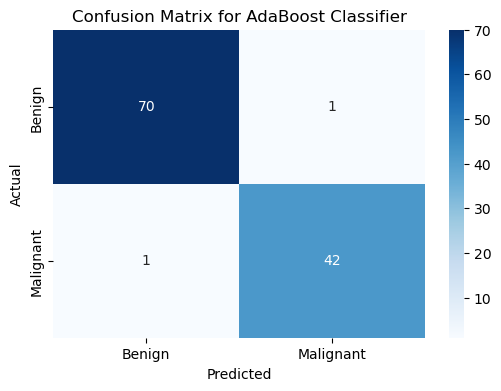


Precision: 0.9767

Recall: 0.9767

F1 Score: 0.9767


In [229]:
# Displaying the evaluation results
print(f"\nAccuracy: {accuracy_smote:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_smote)

# Visualize the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_smote, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for AdaBoost Classifier')
plt.show()

print(f"\nPrecision: {precision_smote:.4f}")
print(f"\nRecall: {recall_smote:.4f}")
print(f"\nF1 Score: {f1_smote:.4f}")

Prints the calculated metrics to assess the model's performance, which is crucial for understanding how well the model is performing.

# Plotting ROC Curve

In [173]:
# ROC Curve
# Get predicted probabilities
y_pred_proba = ada_classifier.predict_proba(X_test)[:, 1]  # Probability of the positive class

In [175]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [177]:
# Calculate the AUC
roc_auc = auc(fpr, tpr)

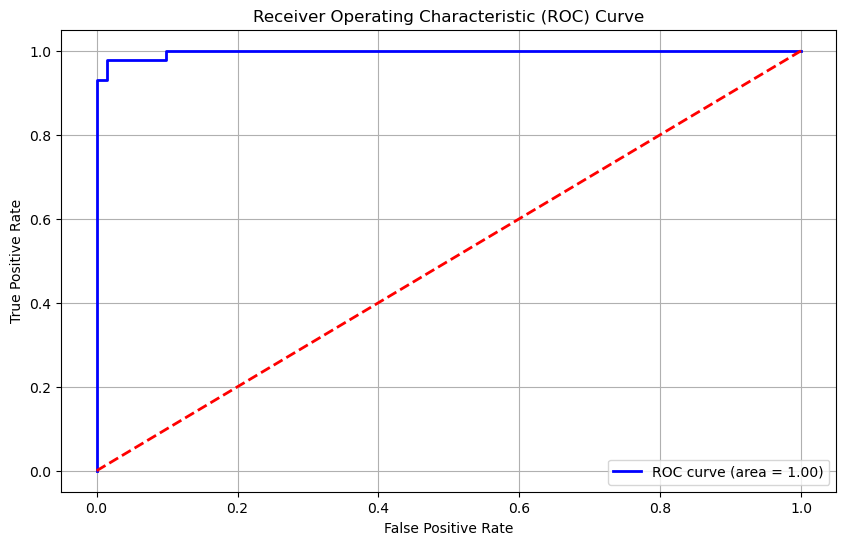

In [179]:
# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

Plots the ROC curve to visualize the model's performance across different thresholds, providing insight into its trade-off between sensitivity and specificity.